In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def Legendre_roots_weights(a, b):
  x1 = ((b-a)*(0.8611363116) + a + b) / 2
  x2 = ((b-a)*(0.3399810436) + a + b) / 2
  x3 = ((b-a)*(-0.8611363116) + a + b) / 2
  x4 = ((b-a)*(-0.3399810436) + a + b) / 2
  w1 = 0.3478548451 * (b-a)/2
  w2 = 0.6521451549 * (b-a)/2
  w3 = 0.3478548451 * (b-a)/2
  w4 = 0.6521451549 * (b-a)/2
  return np.array((x1, x2, x3, x4)), np.array((w1, w2,w3, w4))

In [7]:
Y, W = Legendre_roots_weights(0, 1)

def k(x, t):
  return np.sqrt(x * t)

M = np.empty((4, 4))
for i in range(4):
  for j in range(4):
    M[i][j] = W[j] * k(Y[i], Y[j])

M *= (-1)
M = M + np.eye(4)

In [9]:
def f(x):
  return 5 * np.sqrt(x)

ff = np.empty(4)
for i in range(4):
  ff[i] = f(Y[i])

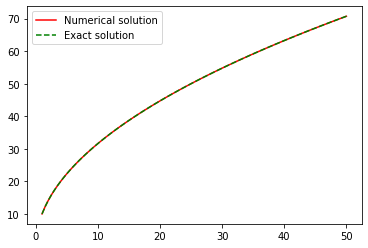

In [10]:
phi = np.linalg.solve(M, ff)

x = np.linspace(1, 50, 100)
phi_x = np.array([np.sum(np.array([W[i] * phi[i] * k(Y[i], j) for i in range(4)])) + f(j) for j in x])
phi_x_exact = np.array([10 * np.sqrt(i) for i in x])

plt.plot(x, phi_x, 'r', label='Numerical solution')
plt.plot(x,  phi_x_exact, 'g--', label='Exact solution')
plt.legend()